# Snapshot figure

In [1]:
using NetCDF, PyPlot, ColorSchemes, Printf, Statistics, StatsBase
cmap = ColorMap(ColorSchemes.berlin.colors)

In [2]:
path = "/network/aopp/chaos/pred/kloewer/shallowwaters/isambard/"
tstep = 200
ncfile = NetCDF.open(joinpath(path,"run0002","sst.nc"))
sst = ncfile.vars["sst"][:,:,tstep];

In [3]:
ncfile = NetCDF.open(joinpath(path,"run0004","sst.nc"))
sst64 = ncfile.vars["sst"][:,:,tstep];

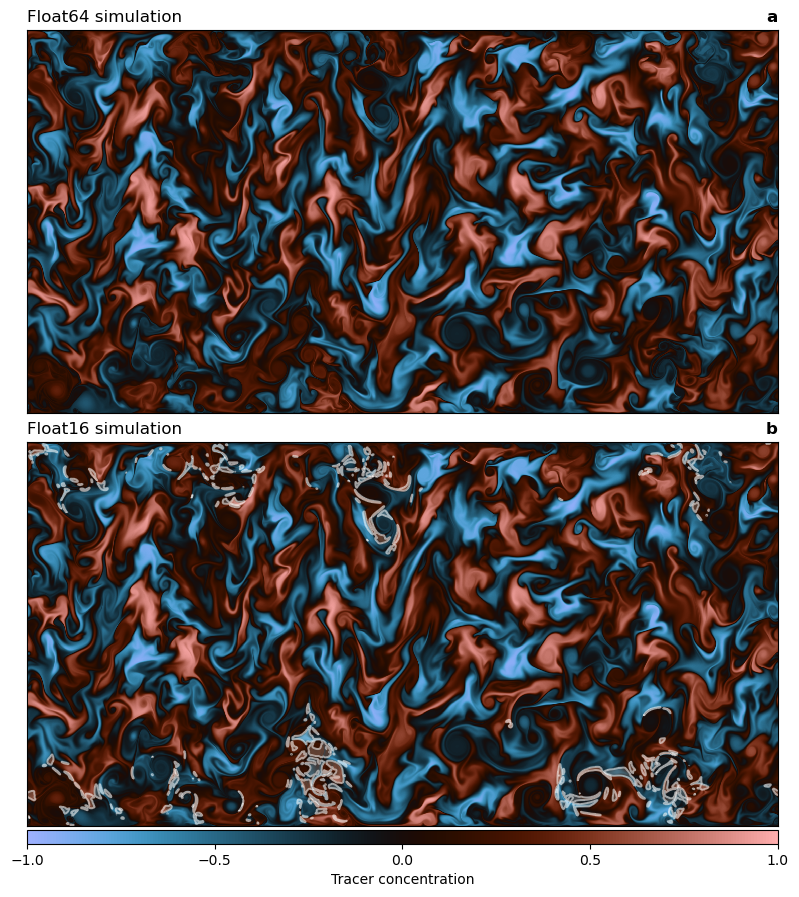

PyObject Text(1.0, 1.0, 'a')

In [4]:
fig,(ax2,ax) = subplots(2,1,figsize=(8,9),sharex=true,sharey=true)

tight_layout(rect=[-0.03,0.05,1,1])
pos = ax.get_position()
cax = fig.add_axes([pos.x0,pos.y0-0.02,pos.x1-pos.x0,0.015])

q = ax.pcolormesh(sst',cmap=cmap,vmin=-1,vmax=1)
ax2.pcolormesh(sst64',cmap=cmap,vmin=-1,vmax=1)

ax.contourf(abs.(sst-sst64)',[0.3,1],colors="w",alpha=0.2)
ax.contour(abs.(sst-sst64)',[0.3,1],colors="w",alpha=0.5,lw=0.1)

cb = colorbar(q,cax=cax,orientation="horizontal")
cb.set_label("Tracer concentration")
cb.set_ticks([-1,-0.5,0,0.5,1])

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Float16 simulation",loc="left")
ax2.set_title("Float64 simulation",loc="left")

ax.set_title("b",loc="right",fontweight="bold")
ax2.set_title("a",loc="right",fontweight="bold")

# savefig("snapshot_comparison.png")

In [3]:
ncfile = NetCDF.open(joinpath(path,"run0002","sst.nc"))
sst = ncfile.vars["sst"][:,:,200];

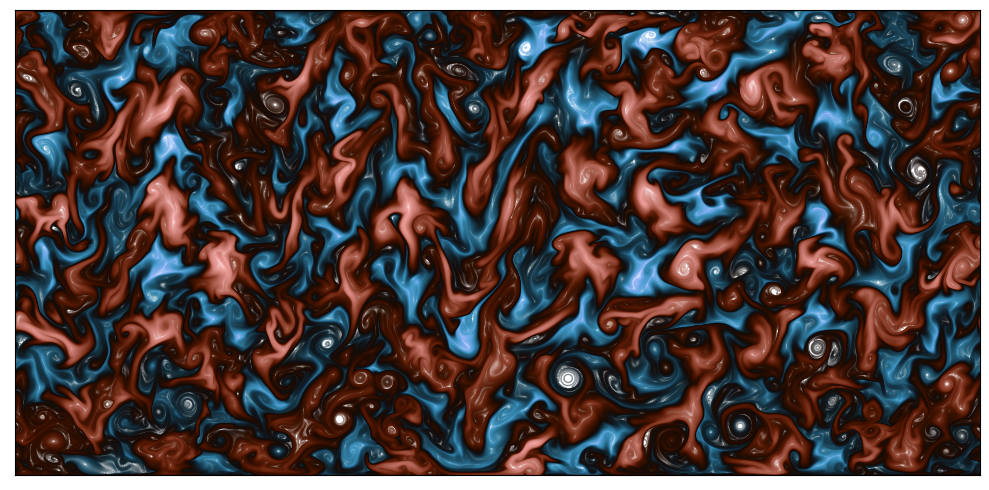

In [57]:
cmap = ColorMap(ColorSchemes.berlin.colors)
fig = figure(figsize=(10,5))

# contour(sst',cmap=cmap)
contour(sst',-1:0.005:1,cmap=cmap,alpha=.5,linewidths=1,linestyles="-")
# contour(sst',0:0.025:1,colors=cmap(1.0)],alpha=1,linewidths=0.3,linestyles="-")
# imshow(rotl90(sign.(sst) .* abs.(sst).^0.7),cmap=cmap)
xticks([])
yticks([])
tight_layout()

In [36]:
?plot

search: plot plot3D plotfile plot_date plot_trisurf plot_surface plot_wireframe



Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)
